In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('cleaned_fitness.csv')

In [3]:
df.head()

,Unnamed: 0,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,0,56,152,65,69.6,117.0,7.513315,2.37,3.97,0,0,1
1,1,69,186,95,60.8,114.8,7.500000,8.77,3.19,0,0,1
2,2,46,192,103,61.4,116.4,7.513315,8.20,2.03,0,0,0
3,3,32,189,83,60.2,130.1,7.000000,6.18,3.68,0,1,1
4,4,60,175,99,58.1,115.8,8.000000,9.95,4.83,1,0,1


In [4]:
df.drop('Unnamed: 0',inplace=True, axis=1)

In [5]:
df

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,7.513315,2.37,3.97,0,0,1
1,69,186,95,60.8,114.8,7.500000,8.77,3.19,0,0,1
2,46,192,103,61.4,116.4,7.513315,8.20,2.03,0,0,0
3,32,189,83,60.2,130.1,7.000000,6.18,3.68,0,1,1
4,60,175,99,58.1,115.8,8.000000,9.95,4.83,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,52,173,98,60.7,106.1,7.513315,1.54,3.25,1,1,1
1996,61,186,74,51.4,123.8,9.400000,8.63,3.15,0,1,1
1997,77,198,89,76.7,103.6,8.300000,1.98,3.36,1,1,0
1998,62,190,63,80.7,115.9,6.700000,9.21,2.39,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        2000 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   int64  
 9   gender             2000 non-null   int64  
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 172.0 KB


In [7]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000
mean,49.114000,174.53300,83.540500,70.288600,119.908850,7.513315,5.035140,2.999040,0.450500,0.4850,0.399500
std,17.926564,14.37175,25.852534,11.846339,14.578032,1.440666,2.864156,1.136383,0.497668,0.4999,0.489918
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000,0.0000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.700000,6.600000,2.547500,2.037500,0.000000,0.0000,0.000000
50%,49.000000,174.00000,83.000000,70.250000,120.000000,7.513315,5.065000,2.980000,0.000000,0.0000,0.000000
75%,65.000000,187.00000,102.000000,78.425000,129.800000,8.400000,7.470000,3.950000,1.000000,1.0000,1.000000
max,79.000000,199.00000,250.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000,1.0000,1.000000


In [8]:
df.isnull().sum()

age                  0
height_cm            0
weight_kg            0
heart_rate           0
blood_pressure       0
sleep_hours          0
nutrition_quality    0
activity_index       0
smokes               0
gender               0
is_fit               0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
x = df.drop('is_fit', axis=1)
y = df['is_fit']

In [11]:
# Cross Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [13]:
# Training
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
y_pred = model.predict(x_test)

In [15]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Accuracy:  0.702
F1 Score:  0.628428927680798
Confusion Matrix: 
 [[225  74]
 [ 75 126]]
Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       299
           1       0.63      0.63      0.63       201

    accuracy                           0.70       500
   macro avg       0.69      0.69      0.69       500
weighted avg       0.70      0.70      0.70       500



In [16]:
!pip install scikit-learn
!pip install graphviz
!pip install pydotplus

In [17]:
print("DataFrame columns:", df.columns.tolist())
print("Shape of df:", df.shape)


DataFrame columns: ['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes', 'gender', 'is_fit']
Shape of df: (2000, 11)


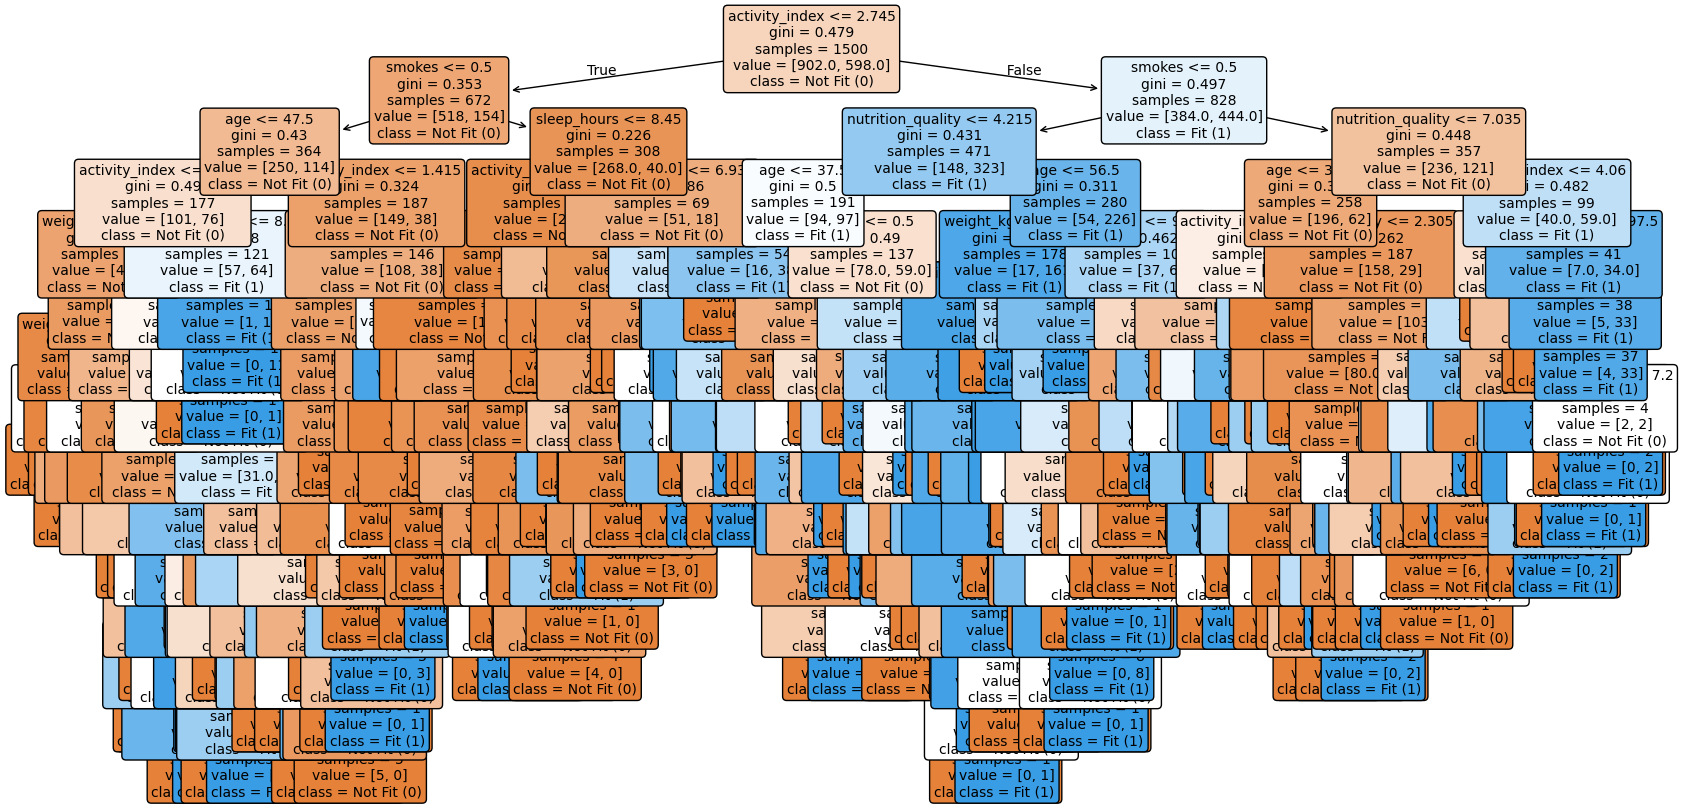

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  
plot_tree(
    model, 
    feature_names=df.drop(columns=['is_fit']).columns,  
    class_names=['Not Fit (0)', 'Fit (1)'],             
    filled=True,       
    rounded=True,      
    fontsize=10
)
plt.show()
